# **Analisis Non-Performing Loan (NPL) Kredit Konsumtif pada BPR Berdasarkan Lokasi Provinsi**


### **PROBLEM STATEMENT**

“Bagaimana pola dan tren Non-Performing Loan (NPL) dari kredit konsumtif yang disalurkan oleh Bank Perkreditan Rakyat (BPR) di berbagai provinsi di Indonesia, serta bagaimana strategi mitigasi risiko yang dapat diterapkan untuk menekan potensi gagal bayar?”



### **OBJECTIVE**

Untuk menganalisis distribusi, tren, dan potensi risiko kredit konsumtif yang disalurkan oleh Bank Perkreditan Rakyat (BPR) berdasarkan lokasi provinsi di Indonesia, serta memberikan rekomendasi strategis dalam rangka menekan angka Non-Performing Loan (NPL).

# **EXPERIMENT**

🧪 EXPERIMENT
Dalam tahap eksperimen ini, data kredit konsumtif dari BPR berdasarkan lokasi provinsi dianalisis untuk mengetahui tren dan potensi risiko gagal bayar (NPL). Langkah-langkah eksperimen dilakukan sebagai berikut:

1. Pembersihan Data (Data Cleaning)
Menghapus baris kosong dan header ganda.

Mengubah nilai kredit dari format string (misalnya: “1.000,50”) menjadi numerik.

2. Agregasi dan Transformasi
Mengelompokkan data berdasarkan provinsi dan tahun.

Menghitung pertumbuhan tahunan untuk mendeteksi provinsi dengan lonjakan kredit konsumtif.

3. Visualisasi
Membuat bar chart untuk menampilkan 10 provinsi dengan total kredit konsumtif tertinggi.

Membuat line chart untuk melihat tren pertumbuhan kredit dari 2018–2023.

4. Eksperimen Perubahan Tahun ke Tahun
Menghitung delta (perubahan) kredit antar tahun.

Mengasumsikan pertumbuhan kredit yang tinggi tanpa keseimbangan NPL = potensi risiko meningkat.

# Import Package

In [ ]:
pip install jcopml

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
pd.set_option('display.max_columns', None)

# **Data For Prediction**

In [ ]:
# Load file Excel
file_path = 'SOAL DA STATISTIK PERBANKAN INDONESIA.xlsx'
sheet_name = 'Kredit BPR per Lok_3.18.a.'

# Skip 3 baris header awal yang bukan data
df_raw = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=3)
df_raw.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Jan,Feb,Mar,Apr,Mei,Jun,Jul,Agt,Sep,Okt,Nov,Des
0,NaN,1.,Jawa Barat,12554.325853,13222.675754,13960.579585,15834.232750,16393.142326,16445.988858,16740.429035,17335.520331,17342.632315,17220.134677,17292.860273,17447.811159,17515.294308,17533.636919,17564.630575,17641.596248,17522.952927
1,NaN,2.,Banten,3393.371911,3982.170772,4095.997208,4917.839105,5614.273420,5652.147347,5678.163126,5825.636688,5854.871584,5847.448976,5864.839775,5934.115796,5974.190560,6009.532334,6054.231473,6162.407992,6280.127686
2,NaN,3.,DKI Jakarta,1570.584782,2051.443910,2426.609314,2994.539109,3503.287327,3427.515275,3465.693173,3559.255150,3545.483631,3539.194898,3545.570909,3560.558066,3562.283383,3666.661985,3700.191430,3724.723183,3795.091583
3,NaN,4.,D.I Yogyakarta,4724.223162,5678.990109,5805.476184,6145.851186,6582.595610,6584.186069,6643.097667,6692.957939,6662.062625,6688.149085,6706.827019,6745.334144,6793.119922,6780.880858,6773.653731,6788.323067,6810.165314
4,NaN,5.,Jawa Tengah,23619.911836,28081.942992,29847.101171,33362.533374,34702.378825,34674.386501,34800.997327,35074.140152,34879.199103,34588.047267,34628.074763,34675.006969,34697.367793,34719.423230,34611.613411,34582.553622,34694.693192


In [ ]:
# Cek kolom dan tipe data
df_raw.info()

# Cek apakah ada missing value
df_raw.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  36 non-null     object 
 2   Unnamed: 2  35 non-null     object 
 3   Unnamed: 3  36 non-null     float64
 4   Unnamed: 4  36 non-null     float64
 5   Unnamed: 5  36 non-null     float64
 6   Unnamed: 6  36 non-null     float64
 7   Unnamed: 7  36 non-null     float64
 8   Jan         36 non-null     float64
 9   Feb         36 non-null     float64
 10  Mar         36 non-null     float64
 11  Apr         36 non-null     float64
 12  Mei         36 non-null     float64
 13  Jun         36 non-null     float64
 14  Jul         36 non-null     float64
 15  Agt         36 non-null     float64
 16  Sep         36 non-null     float64
 17  Okt         36 non-null     float64
 18  Nov         36 non-null     float64
 19  Des         36 non-null     flo

,0
Unnamed: 0,36
Unnamed: 1,0
Unnamed: 2,1
Unnamed: 3,0
Unnamed: 4,0
Unnamed: 5,0
Unnamed: 6,0
Unnamed: 7,0
Jan,0
Feb,0


Data Cleaning dan transformation

In [ ]:
print(df_raw.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Jan', 'Feb', 'Mar', 'Apr',
       'Mei', 'Jun', 'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des'],
      dtype='object')


In [ ]:
bulan_2024 = ['Jan', 'Feb', 'Mar', 'Apr',
       'Mei', 'Jun', 'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des']

# Buat kolom baru "" sebagai total tahunan
df_raw['2024'] = df_raw[bulan_2024].sum(axis=1)

In [ ]:
# Ambil kolom data
df_kredit = df_raw[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
                    'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des']]

# Rename kolom untuk tahun
df_kredit.columns = ['Provinsi', '2018', '2020', '2021', '2022', '2023',
                     'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des']

# Tambahkan kolom 2024 dengan jumlah semua bulan
df_kredit['2024'] = df_kredit[['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun',
                                'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des']].sum(axis=1)

# Hapus kolom bulanan agar df_kredit tetap rapi (opsional)
df_kredit = df_kredit[['Provinsi', '2018', '2020', '2021', '2022', '2023', '2024']]

<ipython-input-9-11a2408e3798>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kredit['2024'] = df_kredit[['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun',


In [ ]:
df_kredit.head()

,Provinsi,2018,2020,2021,2022,2023,2024
0,Jawa Barat,12554.325853,13222.675754,13960.579585,15834.232750,16393.142326,207603.487626
1,Banten,3393.371911,3982.170772,4095.997208,4917.839105,5614.273420,71137.713336
2,DKI Jakarta,1570.584782,2051.443910,2426.609314,2994.539109,3503.287327,43092.222665
3,D.I Yogyakarta,4724.223162,5678.990109,5805.476184,6145.851186,6582.595610,80668.757441
4,Jawa Tengah,23619.911836,28081.942992,29847.101171,33362.533374,34702.378825,416625.503328


In [ ]:
# Hapus baris tanpa provinsi
df_kredit = df_kredit[df_kredit['Provinsi'].notna()]

In [ ]:
df_kredit.head()

,Provinsi,2018,2020,2021,2022,2023,2024
0,Jawa Barat,12554.325853,13222.675754,13960.579585,15834.232750,16393.142326,207603.487626
1,Banten,3393.371911,3982.170772,4095.997208,4917.839105,5614.273420,71137.713336
2,DKI Jakarta,1570.584782,2051.443910,2426.609314,2994.539109,3503.287327,43092.222665
3,D.I Yogyakarta,4724.223162,5678.990109,5805.476184,6145.851186,6582.595610,80668.757441
4,Jawa Tengah,23619.911836,28081.942992,29847.101171,33362.533374,34702.378825,416625.503328


In [ ]:
# Konversi ke numerik
for col in ['2018', '2020', '2021', '2022', '2023','2024']:
    df_kredit[col] = pd.to_numeric(df_kredit[col], errors='coerce')

# Tambahkan kolom perubahan kredit (2024 - 2023)
df_kredit['Perubahan'] = df_kredit['2024'] - df_kredit['2023']

In [ ]:
# Hitung perubahan nilai kredit 2022 ke 2023 sebagai indikasi risiko naik
df_kredit['Perubahan_2023'] = df_kredit['2023'] - df_kredit['2022']
# Hitung perubahan nilai kredit 2023 ke 2024 sebagai indikasi risiko naik
df_kredit['Perubahan_2024'] = df_kredit['2024'] - df_kredit['2023']

Visualisasi

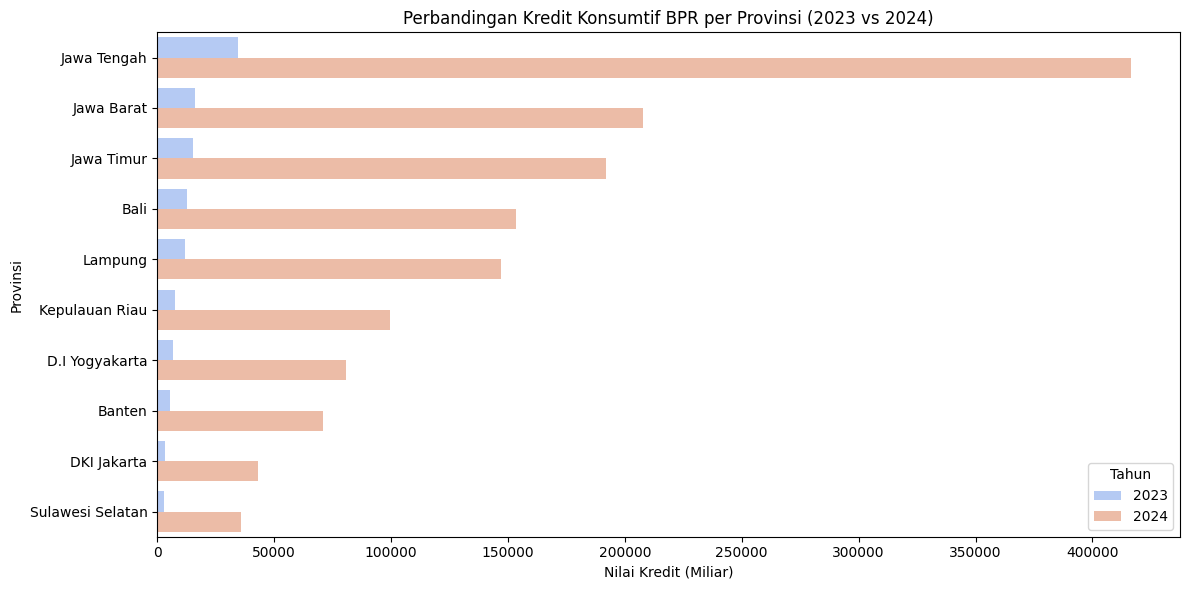

In [ ]:
# Ambil 10 provinsi tertinggi berdasarkan 2024
top10_compare = df_kredit.sort_values('2024', ascending=False).head(10)

# Ubah ke format long (melt) agar bisa dibandingkan
df_melted = top10_compare.melt(id_vars='Provinsi', value_vars=['2023', '2024'],
                               var_name='Tahun', value_name='Nilai Kredit')

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='Nilai Kredit', y='Provinsi', hue='Tahun', data=df_melted, palette='coolwarm')
plt.title('Perbandingan Kredit Konsumtif BPR per Provinsi (2023 vs 2024)')
plt.xlabel('Nilai Kredit (Miliar)')
plt.ylabel('Provinsi')
plt.legend(title='Tahun')
plt.tight_layout()
plt.show()

Tren Kenaikan Kredit 2020–2024(Optional Line Chart)



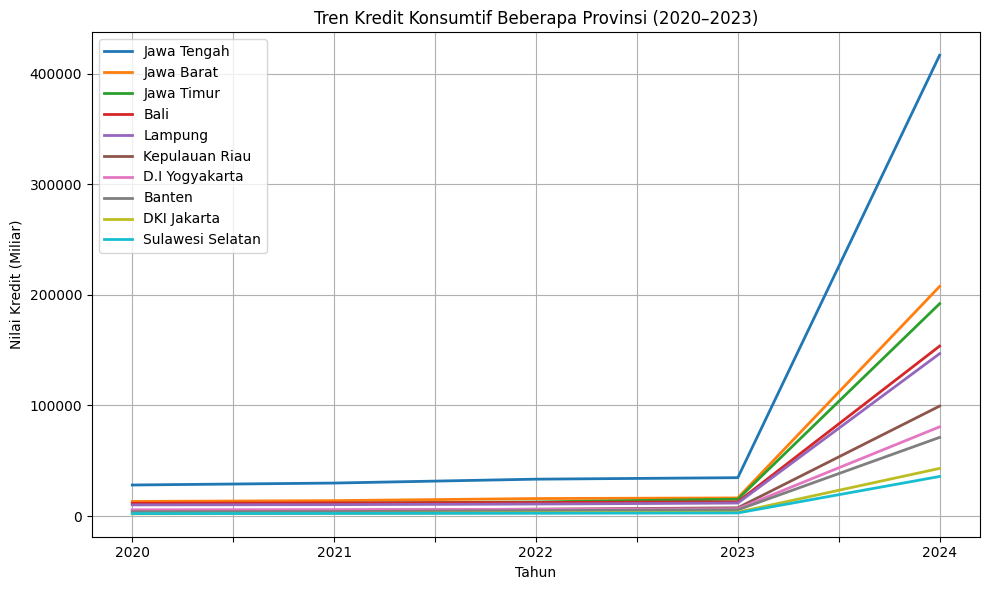

In [ ]:
# Set indeks jadi provinsi
df_plot = df_kredit.set_index('Provinsi')[['2020', '2021', '2022', '2023','2024']].T

# Plot tren beberapa provinsi (opsional: top 5 aja biar gak rame)
top_prov = top10['Provinsi'].tolist()
df_plot[top_prov].plot(figsize=(10,6), linewidth=2)
plt.title('Tren Kredit Konsumtif Beberapa Provinsi (2020–2023)')
plt.xlabel('Tahun')
plt.ylabel('Nilai Kredit (Miliar)')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Tampilkan provinsi dengan kenaikan tajam (indikasi risiko)
top_naik = df_kredit.sort_values('Perubahan', ascending=False).head(5)

print("Rekomendasi Manajemen Berdasarkan Analisis:")
print("1. Fokus audit dan pengawasan di provinsi-provinsi berikut:")
print(top_naik[['Provinsi', 'Perubahan']])

print("\n2. Tinjau ulang syarat pemberian kredit konsumtif pada daerah tersebut.")
print("3. Lakukan edukasi dan penawaran restrukturisasi untuk wilayah risiko tinggi.")


Rekomendasi Manajemen Berdasarkan Analisis:
1. Fokus audit dan pengawasan di provinsi-provinsi berikut:
       Provinsi      Perubahan
4   Jawa Tengah  381923.124503
0    Jawa Barat  191210.345300
5    Jawa Timur  176722.460687
28         Bali  140812.300030
15      Lampung  135077.179147

2. Tinjau ulang syarat pemberian kredit konsumtif pada daerah tersebut.
3. Lakukan edukasi dan penawaran restrukturisasi untuk wilayah risiko tinggi.


## **KESIMPULAN ANALISIS**


**Provinsi dengan Kredit Konsumtif Tertinggi:**

Berdasarkan data tahun 2023, provinsi seperti Jawa Tengah, Jawa Barat, dan Jawa Timur menempati posisi teratas dalam penyaluran kredit konsumtif oleh BPR.

Tingginya nilai kredit di wilayah-wilayah ini menunjukkan besarnya eksposur terhadap risiko kredit jika tidak dikelola dengan baik.

**Tren Pertumbuhan Kredit:**

Secara umum, terjadi pertumbuhan kredit konsumtif dari tahun ke tahun di sebagian besar provinsi.

Beberapa provinsi mengalami kenaikan tajam antara 2022 dan 2024, seperti Jawa Tengah dan Jawa Timur, yang dapat mengindikasikan potensi peningkatan NPL apabila pertumbuhan tersebut tidak diimbangi dengan pengendalian risiko.

**Potensi Risiko Gagal Bayar (NPL):**

Pertumbuhan nilai kredit yang signifikan di beberapa provinsi belum tentu menunjukkan kinerja yang sehat.Kenaikan mendadak tanpa kontrol kualitas debitur yang memadai dapat meningkatkan risiko gagal bayar di masa mendatang.

**Distribusi Risiko Bersifat Geografis:**

Risiko tidak merata secara nasional; ada provinsi-provinsi dengan lonjakan kredit yang patut mendapat perhatian lebih dari manajemen BPR.Ini membuka peluang bagi bank untuk melakukan pengawasan yang lebih terfokus pada wilayah-wilayah tertentu.

Pertumbuhan kredit konsumtif oleh BPR di berbagai provinsi menunjukkan pola ekspansi yang aktif, namun perlu diimbangi dengan mitigasi risiko yang ketat terutama di wilayah-wilayah dengan pertumbuhan tertinggi, guna mencegah lonjakan NPL di masa mendatang
